In [2]:
import numpy as np
import pandas as pd
import math, copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
""" functions definitions """
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [4]:
def lossFunction(w):
    res = 1
    for i,j in points:
        res+=(sigmoid(w.dot(i))-j)**2
    return res/len(x)

In [5]:
def gradientFunction(w):
    return sum(2*x*(sigmoid(w.dot(x))-y)*(sigmoid(w.dot(x))*(1-sigmoid(w.dot(x)))) for x, y in points)/len(x)

def gradientDescent(W, eta = 0.01, iterations = 100, printing = 0):
    w = copy.deepcopy(W)
    Fw = []
    for i in range (iterations):
        fw = lossFunction(w)
        Fw.append(fw)
        gradient = gradientFunction(w)
        w -= eta * gradient
        if(printing == 1):
            print("iteration = {}, w {}, fw: {}".format(i, w, fw))
    print("Loss = ", fw)
    return w,Fw

In [6]:
"""" data reading and processing """
data = pd.read_csv("marathon.csv")

y=data['deposit'].values

data = data.drop("deposit", axis=1)
data = (data-data.min())/(data.max()-data.min())
x = data.values

d = x.shape[1]

points = []
for i in range(len(x)):
    points.append((x[i], y[i]))

w = np.zeros(d)

W, f = gradientDescent(w, 0.01, iterations = 1000)

Loss =  0.24305545356230504


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


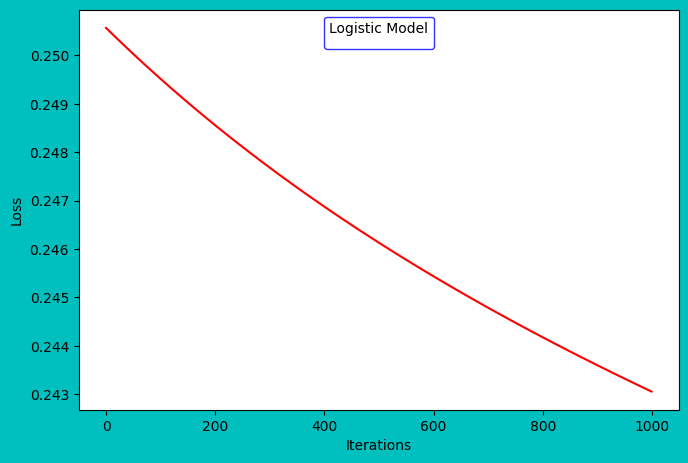

In [7]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.plot(np.arange(1000),f,color='r')
plt.legend(facecolor='white',loc='upper center', edgecolor='b', title='Logistic Model')

In [8]:
w = np.random.rand(d)
W1, f1 = gradientDescent(w, 0.01, iterations = 1000)

Loss =  0.25039892110335304


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


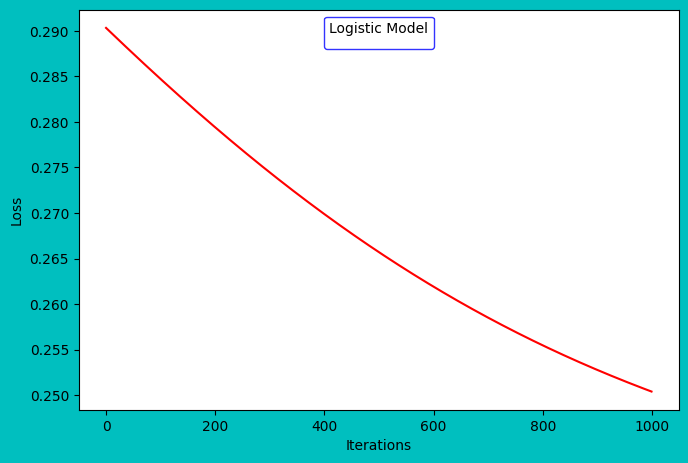

In [9]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.plot(np.arange(1000),f1,color='r')
plt.legend(facecolor='white',loc='upper center', edgecolor='b', title='Logistic Model')

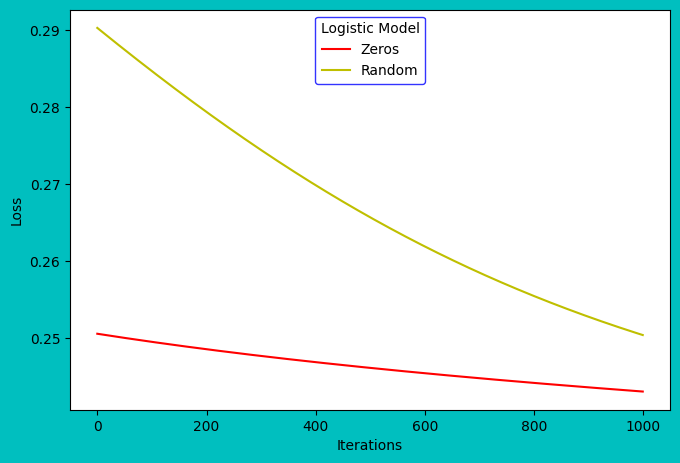

In [10]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.plot(np.arange(1000),f,color='r')
plt.plot(np.arange(1000),f1,color='y')
plt.legend(['Zeros','Random'],facecolor='white',loc='upper center', edgecolor='b', title='Logistic Model')

In [11]:
w = np.zeros(d)
W1, f1 = gradientDescent(w, 0.1, iterations = 1000)
W2, f2 = gradientDescent(w, 0.05, iterations = 1000)
W3, f3 = gradientDescent(w, 0.01, iterations = 1000)
W4, f4 = gradientDescent(w, 0.005, iterations = 1000)
W5, f5 = gradientDescent(w, 0.001, iterations = 1000)

Loss =  0.22057496426230783
Loss =  0.22990280006220748
Loss =  0.24305545356230504
Loss =  0.2461314783456426
Loss =  0.24951411422544387


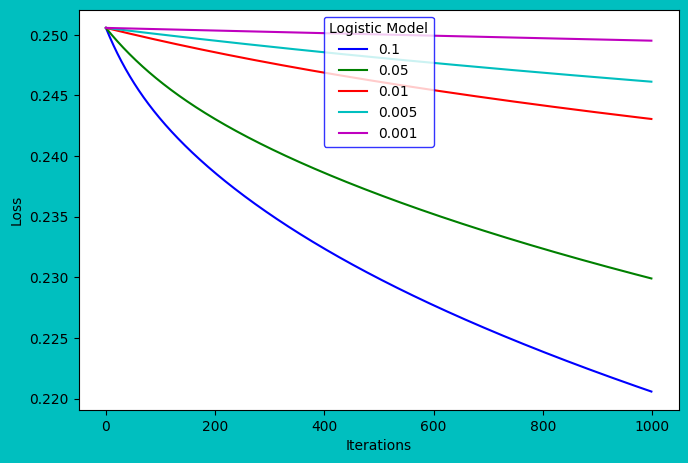

In [12]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.plot(np.arange(1000),f1,color='b')
plt.plot(np.arange(1000),f2,color='g')
plt.plot(np.arange(1000),f3,color='r')
plt.plot(np.arange(1000),f4,color='c')
plt.plot(np.arange(1000),f5,color='m')
plt.legend(['0.1','0.05', '0.01', '0.005', '0.001'],facecolor='white',loc='upper center', edgecolor='b', title='Logistic Model')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x = X_train
y = y_train

W, _ = gradientDescent(w, 0.1, iterations = 10000)


Loss =  0.2184547290279659


In [14]:
W

array([-0.44455653, -0.23935802,  0.76122738, -1.08064025, -0.5999505 ,
       -0.46416935,  7.37075107, -1.4630327 ,  2.44260597,  1.02248575])

In [15]:
def predict(X, w):
  Y = []
  for x in X:
    if sigmoid(x.dot(w)) >= 0.5:
      Y.append(1)
    else:
      Y.append(0)
  return Y

In [16]:
pred_y = predict(X_test,W)

In [17]:
accuracy_score(y_test, pred_y)

0.7393767705382436